# Problem Statement

   > Upload your executable code here to the following problem statement: We have an NxM grid there are two animals one is 'Horse' and another is 'Bishop' which has different moving abilities. A 'Horse' can move 2.5 steps and a 'Bishop' can move only diagonal but not horizontally or vertically. Some grids are marked as inactive. Return 1 position where these animals can meet at any point. In the following image 0,3 & 2,0 are represented as an inactive grid where none of the animals can visit and 'Bishop' is at 3,2 position and possible direction are represented as arrow and 'Horse' is available at 6,6 and possible direction where horse can move are represented as arrow and circles. One of the possible point where the Bishop and Horse can meet is 4,5 as represented by yellow color. You need to use your own data structure, data types and test cases asper the requirement. (Hint: use graph algorithm - BFS) *

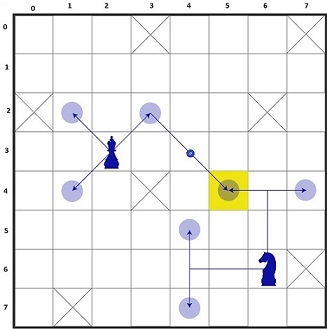

### row count ---> will be done from top to bottom ---> numbering starts from 1 to 
### column count ---> will be done from left to right ---> numbering starts from 1 to 

In [65]:
row_count = input("Number of horizontal rows we want in the board. Enter a single integer = ")
col_count = input("Number of vertical columns we want in the board. Enter a single integer = ")

# Converting row_count and col_count ---> string to integer 
row_count = (int(row_count))
col_count = (int(col_count))

board_size = (row_count, col_count)
board_size = (int(board_size[0]), int(board_size[1]))

print('\nHorizontal rows where each row numbered starting from 1 to {}'.format(row_count))
print('Vertical columns where each column numbered starting from 1 to {}'.format(col_count))

# Entering the current bishop and horse positions within the board range
given_b = input("\nEnter the bishop position row_value column_value in the board within Horizontal rows & Vertical columns range by entering 2 numbers with space = ").split()
given_b = (int(given_b[0]), int(given_b[1]))
while given_b[0] > row_count or given_b[1] > col_count:
    given_b = input("\nRe-enter the bishop position in the board by entering 2 numbers within the board range with space  = ").split()
    given_b = (int(given_b[0]), int(given_b[1]))
    
given_h = input("Enter the horse position row_value column_value in the board within Horizontal rows & Vertical columns range by entering 2 numbers with space = ").split()
given_h = (int(given_h[0]), int(given_h[1]))
while given_h[0] > row_count or given_h[1] > col_count:
    given_h = input("\nRe-enter the horse position in the board by entering 2 numbers within the board range with space  = ").split()
    given_h = (int(given_h[0]), int(given_h[1]))


# converting ---> given_b and given_h to tuple of integers
given_b = (int(given_b[0]), int(given_b[1]))
given_h = (int(given_h[0]), int(given_h[1]))

# Inactive positions in the board where horse and bishop should not move to
inactive_pos = [(0,3),(0,7),(2,0),(2,6),(4,3),(6,7),(7,1)]


print("\nNumber of Rows: ",row_count)
print("Number of Columns: ",col_count)
print("Chess Board Size: ",row_count," * ",col_count)
print("Position of Bishop: ",given_b)
print("Position of Horse: ",given_h)
print("Board Size: ",board_size)

Number of horizontal rows we want in the board. Enter a single integer = 9
Number of vertical columns we want in the board. Enter a single integer = 9

Horizontal rows where each row numbered starting from 1 to 9
Vertical columns where each column numbered starting from 1 to 9

Enter the bishop position row_value column_value in the board within Horizontal rows & Vertical columns range by entering 2 numbers with space = 9 9
Enter the horse position row_value column_value in the board within Horizontal rows & Vertical columns range by entering 2 numbers with space = 9 1

Number of Rows:  9
Number of Columns:  9
Chess Board Size:  9  *  9
Position of Bishop:  (9, 9)
Position of Horse:  (9, 1)
Board Size:  (9, 9)


In [66]:
b_nextsteps = [(-1,1),(-1,-1),(1,1),(1,-1)] # List of Bishop movement patterns
h_nextsteps = [(-1,2),(1,2),(-2,1),(2,1),(-2,-1),(2,-1),(-1,-2),(1,-2)] # Horse movement patterns

In [68]:
# Accoring to the Breadth First Search Algorithm

all_b = [given_b] # list of positions possible for bishop
all_h = [given_h] # list of positions possible for horse
b_pos = [given_b] # List of positions to be explored by bishop
h_pos = [given_h] # List of positions to be explored by horse

while len(b_pos) !=0: # Runs until there are no further positions to be explored
    s_pos = b_pos[0] # there is a tuple in s_pos i.e., the next 1st position to be explored
    
    for i in b_nextsteps:
        new_x = s_pos[0] + i[0] # we are updating current row position by using the bishop movement pattern
        new_y = s_pos[1] + i[1] # we are updating current column position by using the bishop movement pattern
        # So next bishop location has been updated

        if (new_x > 0) & (new_x < board_size[0]+1) & (new_y > 0) & (new_y < board_size[1]+1) & ((new_x,new_y) not in all_b) & ((new_x,new_y) not in inactive_pos):
        # In the if condition we are checking if the new location is out of board boundaries & in restricted cells    
            b_pos.append((new_x,new_y))
            all_b.append((new_x,new_y))
    
    b_pos.remove(s_pos) # already visited position will be removed from the list of positions to be explored.
    
    
# As above mentioned comments for bishop same goes for the horse    
while len(h_pos) !=0:
    s_pos = h_pos[0]
    for i in h_nextsteps:
        new_x = s_pos[0] + i[0]
        new_y = s_pos[1] + i[1]
        if (new_x > 0) & (new_x < board_size[0]+1) & (new_y > 0) & (new_y < board_size[1]+1) & ((new_x,new_y) not in all_h) & ((new_x,new_y) not in inactive_pos):
            h_pos.append((new_x,new_y))
            all_h.append((new_x,new_y))
    h_pos.remove(s_pos)


In [70]:
all_b_set = set(all_b) # converting bishop positions into set datatype
meet_points = all_b_set.intersection(all_h) # Using the set data type pre-existing method intersection to find the common positions of horse and bishop
print("Possible Meeting Points of bishop and horse: ",meet_points)

Possible Meeting Points of bishop and horse:  {(3, 1), (3, 7), (4, 6), (5, 1), (5, 7), (9, 5), (8, 6), (2, 2), (1, 3), (1, 9), (2, 8), (6, 2), (7, 7), (6, 8), (4, 2), (3, 3), (3, 9), (4, 8), (5, 3), (8, 2), (5, 9), (9, 1), (9, 7), (8, 8), (2, 4), (1, 5), (6, 4), (7, 3), (7, 9), (3, 5), (4, 4), (5, 5), (8, 4), (9, 3), (9, 9), (1, 1), (1, 7), (6, 6), (7, 5)}
